In [ ]:
from google.colab import drive
import os 
drive.mount('/content/gdrive')
if os.getcwd() != '/content/drive/My Drive/Colab Notebooks/GAN': 
    os.chdir('gdrive/My Drive/Colab Notebooks/GAN')

<function matplotlib.pyplot.show>

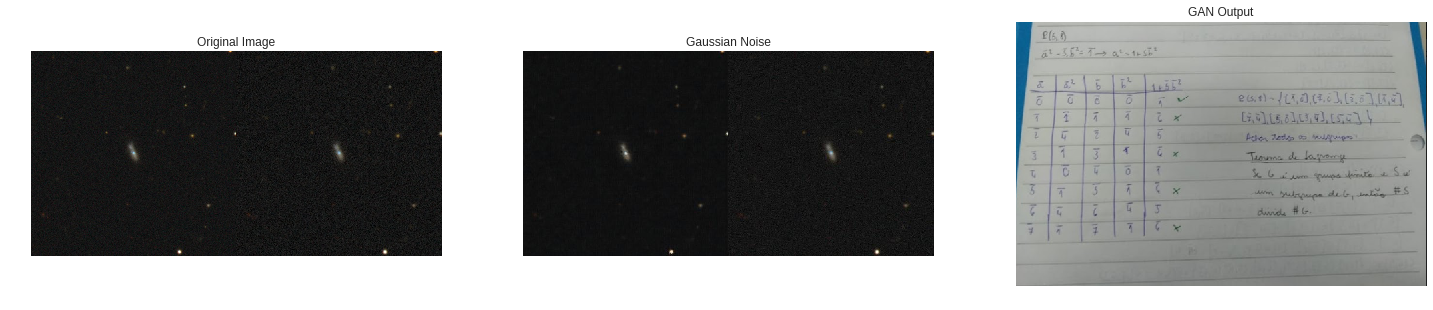

In [ ]:
import matplotlib.pyplot as plt

labels = ['Original Image', 'Gaussian Noise', 'GAN Output']

plt.figure(figsize=(25,25))

for i in range(3):
    plt.subplot(1,3,i+1)
    image = plt.imread(str(i+1) + '.jpg')
    plt.imshow(image)
    plt.title(labels[i])
    plt.axis('off')
    plt.show

In [ ]:
import time
import sys
from IPython import embed
import matplotlib.pyplot as plt

def prepocess_test(img, cond):

    img = scipy.misc.imresize(img, [conf.train_size, conf.train_size])
    cond = scipy.misc.imresize(cond, [conf.train_size, conf.train_size])
    img = img.reshape(1, conf.img_size, conf.img_size, conf.img_channel)
    cond = cond.reshape(1, conf.img_size, conf.img_size, conf.img_channel)
    img = img/127.5 - 1.
    cond = cond/127.5 - 1.
    return img,cond

def test():

    if not os.path.exists("test"):
        os.makedirs("test")
    data = load_data()
    model = CGAN()

    d_opt = tf.train.AdamOptimizer(learning_rate=conf.learning_rate).minimize(model.d_loss, var_list=model.d_vars)
    g_opt = tf.train.AdamOptimizer(learning_rate=conf.learning_rate).minimize(model.g_loss, var_list=model.g_vars)

    saver = tf.train.Saver()

    counter = 0
    start_time = time.time()

    with tf.Session() as sess:
        saver.restore(sess, conf.model_path_test)
        test_data = data["test"]()
        key = 0
        labels = ['Original Image', 'Gaussian Noise', 'GAN Output']
        for img, cond, name in test_data:
            pimg, pcond = prepocess_test(img, cond)
            gen_img = sess.run(model.gen_img, feed_dict={model.image:pimg, model.cond:pcond})
            gen_img = gen_img.reshape(gen_img.shape[1:])
            gen_img = (gen_img + 1.) * 127.5
            
            plt.figure(figsize=(25,25))
            
            plt.subplot(1,3,1)
            #image = plt.imread()
            plt.imshow(img)
            plt.title(labels[0])
            plt.axis('off')
            
            plt.subplot(1,3,2)
            #image = plt.imread(str(i+1) + '.jpg')
            plt.imshow(cond)
            plt.title(labels[1])
            plt.axis('off')
            
            plt.subplot(1,3,3)
            #image = plt.imread(str(i+1) + '.jpg')
            plt.imshow(gen_img)
            plt.title(labels[2])
            plt.axis('off')
            
            plt.show
            
            if key == 10:
                break
            #image = np.concatenate((gen_img, cond), axis=1).astype(np.int)
            #imsave(image, "./test" + "/%s" % name)

if __name__ == "__main__":
    if len(sys.argv) > 1 and sys.argv[1] == 'gpu=':
        os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
        os.environ["CUDA_VISIBLE_DEVICES"]=str(sys.argv[1][4:])
    else:
        os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
        os.environ["CUDA_VISIBLE_DEVICES"]=str(0)
    test()